**Import Required Libraries**

In [ ]:
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install numpy
!pip install scikit-learn

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import os

**Read the csv File**

In [127]:
cpp = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/Cleaned_Corp_Production_Prediction_DataSet.csv")
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t)
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0


In [128]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

- **Unique Values in Each Column:**

- - ***Unique Country:***

In [129]:
Country = pd.DataFrame(cpp['Country'].unique(), columns=['Country'])
Country.head(10)

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
5,Argentina
6,Armenia
7,Australia
8,Austria
9,Azerbaijan


- - ***Unique Item:***

In [130]:
Item = pd.DataFrame(cpp['Item'].unique(), columns=['Item'])
Item.head(10)

,Item
0,"Almonds, in shell"
1,"Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw"
2,Apples
3,Apricots
4,Asses
5,Barley
6,Butter and ghee of sheep milk
7,Butter of cow milk
8,"Buttermilk, dry"
9,Camels


- - ***Unique Year:***

In [131]:
Year = pd.DataFrame(cpp['Year'].unique(), columns=['Year'])
Year.head(10)

,Year
0,2019
1,2020
2,2021
3,2022
4,2023


In [132]:
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t)
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0


**1.	Analyze Crop Distribution:**

>*Crop Types: Study the distribution of the Item column to identify the most and least cultivated crops across regions.*

In [133]:
top = 10
top_item = cpp['Item'].value_counts().nlargest(top).reset_index()
top_item.columns = ['Crop', 'Crop_Count']
top_item

,Crop,Crop_Count
0,"Meat of chickens, fresh or chilled",975
1,Cattle,965
2,"Hen eggs in shell, fresh",962
3,"Meat of cattle with the bone, fresh or chilled",960
4,Raw hides and skins of cattle,960
5,"Edible offal of cattle, fresh, chilled or frozen",960
6,"Cattle fat, unrendered",960
7,"Other vegetables, fresh n.e.c.",938
8,Raw milk of cattle,935
9,Chickens,933


In [134]:
bottom = 10
bottom_item = cpp['Item'].value_counts().nsmallest(bottom).reset_index()
bottom_item.columns = ['Crop', 'Crop_Count']
bottom_item

,Crop,Crop_Count
0,Jojoba seeds,5
1,"Kapok fibre, raw",8
2,Kapokseed in shell,8
3,Tallowtree seeds,10
4,Other camelids,10
5,"Meat of other domestic rodents, fresh or chilled",10
6,Kapok fruit,10
7,"Meat of other domestic camelids, fresh or chilled",10
8,Other rodents,10
9,Mat� leaves,15


C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\2523666727.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\2523666727.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




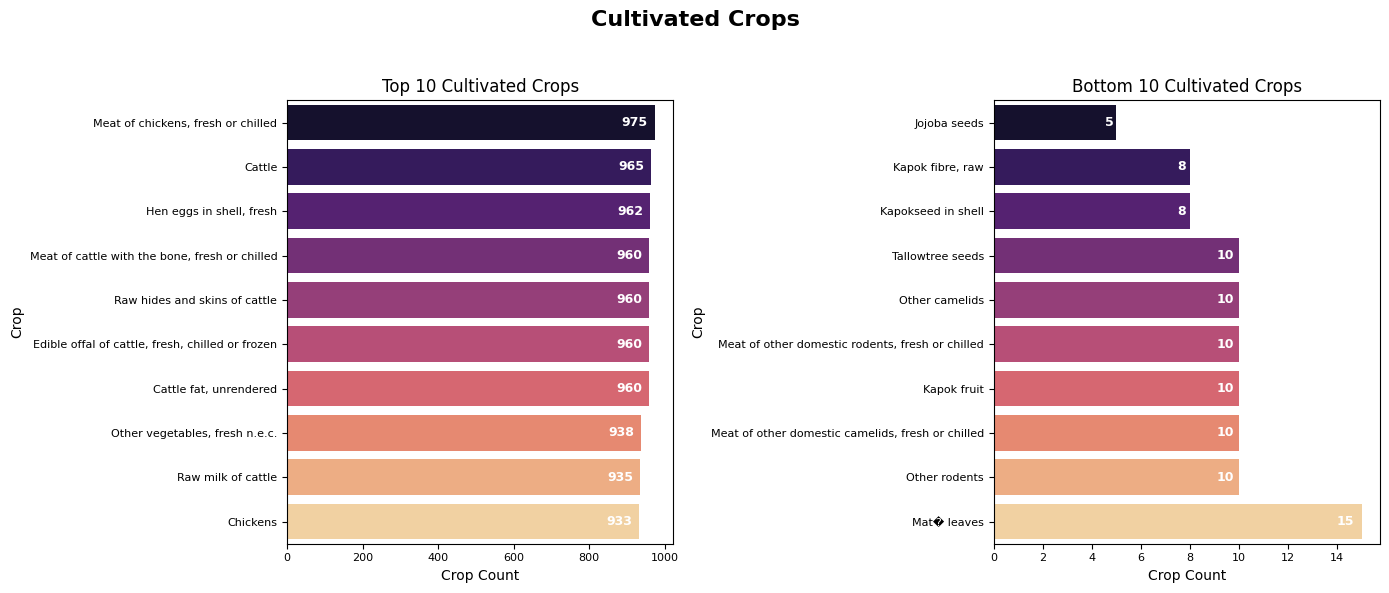

In [135]:
plt.figure(figsize=(14, 6))

# --- Top 10 (Horizontal Bar Chart) ---
plt.subplot(1, 2, 1)
ax = sns.barplot(data=top_item, y='Crop', x='Crop_Count', palette='magma', orient='h')

for bar in ax.patches:
    width = bar.get_width()
    if width > 0:
        ax.text(
            width * 0.98,  # near end of bar
            bar.get_y() + bar.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            color='white',
            fontweight='bold',
            fontsize=9
        )

plt.xlabel('Crop Count')
plt.ylabel('Crop')
plt.title('Top 10 Cultivated Crops')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)



# --- Bottom 10 (Horizontal Bar Chart) ---
plt.subplot(1, 2, 2)
ax = sns.barplot(data=bottom_item, y='Crop', x='Crop_Count', palette='magma', orient='h')

for bar in ax.patches:
    width = bar.get_width()
    if width > 0:
        ax.text(
            width * 0.98,
            bar.get_y() + bar.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            color='white',
            fontweight='bold',
            fontsize=9
        )

plt.xlabel('Crop Count')
plt.ylabel('Crop')
plt.title('Bottom 10 Cultivated Crops')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.suptitle('Cultivated Crops', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


>*Geographical Distribution: Explore the Area column to understand which regions focus on specific crops or have high agricultural activity.*

In [136]:
top_country_crops = cpp.groupby(['Country', 'Item'])['Area harvested (ha)'].sum().reset_index()
top_country_crops.head()

top_country_crops = top_country_crops.sort_values(by='Area harvested (ha)', ascending=False)
top_country_crops.head()

,Country,Item,Area harvested (ha)
8191,India,Rice,231370000.0
3430,China,Maize (corn),213319730.0
3836,"China, mainland",Maize (corn),213153000.0
2307,Brazil,Soya beans,197711572.0
18492,United States of America,Maize (corn),167483400.0


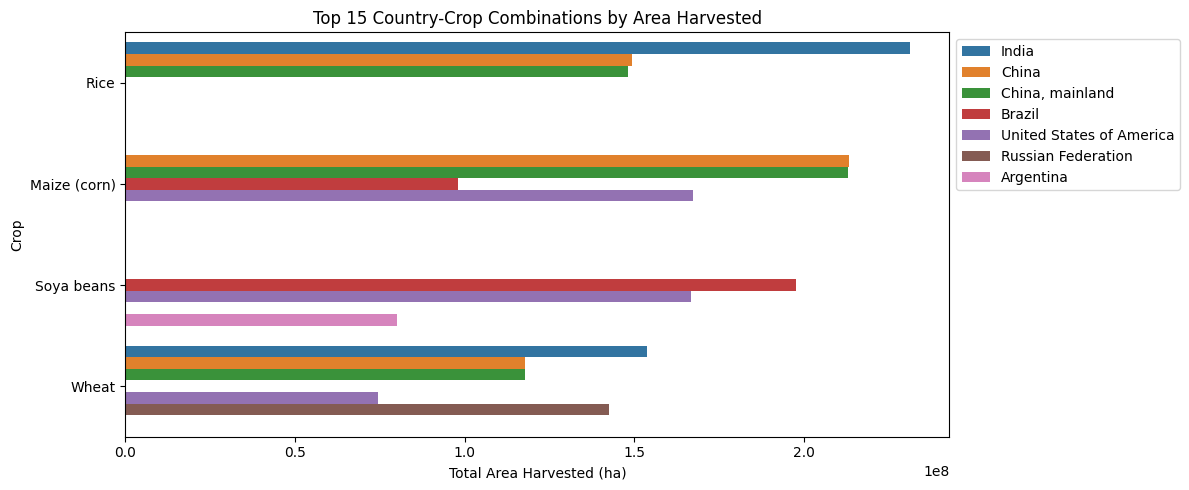

In [137]:
# Plot top 15 country-crop combinations
plt.figure(figsize=(12,5))
sns.barplot(data=top_country_crops.head(15), x='Area harvested (ha)', y='Item', hue='Country')
plt.title('Top 15 Country-Crop Combinations by Area Harvested')
plt.xlabel('Total Area Harvested (ha)')
plt.ylabel('Crop')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**2. Temporal Analysis:**

> *Yearly Trends: Analyze the Year column to detect trends in Area harvested, Yield, and Production over time.*

- > **Agricultural Trends in Area Harvested, Yield, and Production Over Years**

C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\549575378.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\549575378.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\549575378.py:29: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\549575378.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dhars\AppData\Local\Temp\ipykernel_27360\549575378.py:54: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\dha

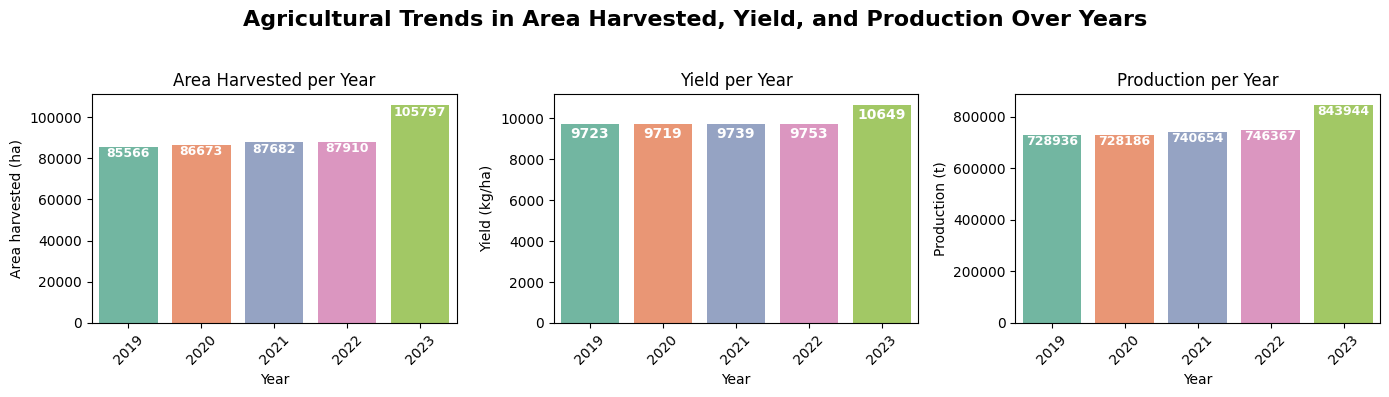

In [138]:
plt.figure(figsize=(14, 4))

#***Area harvested (ha) Per Year:***
plt.subplot(1,3,1)
ax = sns.barplot(data=cpp, x = 'Year', y = 'Area harvested (ha)', palette= 'Set2',ci=None)

# Add text inside bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 150,  # slightly below the top
        f'{int(height)}',
        ha='center',
        va='top',
        color='white',
        fontweight='bold',
        fontsize=9
    )

plt.xlabel('Year')
plt.ylabel('Area harvested (ha)')
plt.title('Area Harvested per Year')
plt.xticks(rotation=45)


#***Yield (kg/ha) Per Year:***
plt.subplot(1,3,2)
ax = sns.barplot(data=cpp, x = 'Year', y = 'Yield (kg/ha)', palette= 'Set2',ci=None)

# Add text inside bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 150,  # slightly below the top
        f'{int(height)}',
        ha='center',
        va='top',
        color='white',
        fontweight='bold',
        fontsize=10
    )

plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.title('Yield per Year')
plt.xticks(rotation=45)



#***Production (t) Per Year:***
plt.subplot(1,3,3)
ax = sns.barplot(data=cpp, x = 'Year', y = 'Production (t)', palette= 'Set2',ci=None)

# Add text inside bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 150,  # slightly below the top
        f'{int(height)}',
        ha='center',
        va='top',
        color='white',
        fontweight='bold',
        fontsize=9
    )

plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.title('Production per Year')
plt.xticks(rotation=45)

plt.suptitle('Agricultural Trends in Area Harvested, Yield, and Production Over Years', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

>*Growth Analysis: Investigate if certain crops or regions show increasing or decreasing trends in yield or production.*


- > ***Top & Bottom Country wise Area harvested Per Year:***

In [139]:
#***Country wise Area harvested Per Year:***
# Step 1: Group data by Country and Year
grouped_harvested = cpp.groupby(['Country', 'Year'])['Area harvested (ha)'].sum().reset_index()
grouped_harvested.head()

# Step 2: Compute total area harvested per country
total_by_country_harvested = grouped_harvested.groupby('Country')['Area harvested (ha)'].sum().reset_index()
total_by_country_harvested.head()

# Step 3: Get Top N countries
top_n_harvested = 5  # Change this to your desired N
top_countries_harvested = total_by_country_harvested.nlargest(top_n_harvested, 'Area harvested (ha)')['Country']
top_countries_harvested

# Step 4: Filter original grouped_harvested data
top_filtered_harvested = grouped_harvested[grouped_harvested['Country'].isin(top_countries_harvested)]
top_filtered_harvested.head()

# Step 3: Get Bottom N countries
bottom_n_harvested = 5  # Change this to your desired N
bottom_countries_harvested = total_by_country_harvested.nsmallest(bottom_n_harvested, 'Area harvested (ha)')['Country']
bottom_countries_harvested

# Step 4: Filter original grouped_harvested data
bottom_filtered_harvested = grouped_harvested[grouped_harvested['Country'].isin(bottom_countries_harvested)]
bottom_filtered_harvested.head()

,Country,Year,Area harvested (ha)
315,Faroe Islands,2019,33156.0
316,Faroe Islands,2020,33155.0
317,Faroe Islands,2021,33155.0
318,Faroe Islands,2022,33155.0
319,Faroe Islands,2023,33154.0


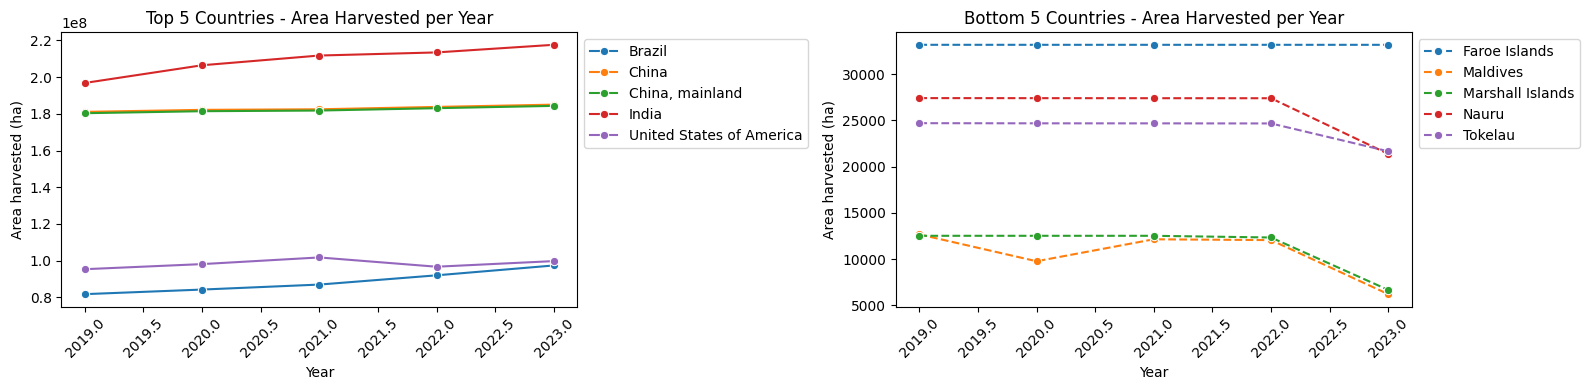

In [140]:
# Step 5: Plot
plt.figure(figsize=(16, 4))

#***Top 5 Country wise Area harvested (ha) Per Year:***
plt.subplot(1,2,1)
sns.lineplot(data=top_filtered_harvested, x='Year', y='Area harvested (ha)', hue='Country', marker='o')
plt.title(f'Top {top_n_harvested} Countries - Area Harvested per Year')
plt.ylabel('Area harvested (ha)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


#***Bottom 5 Country wise Area harvested (ha) Per Year:***
plt.subplot(1,2,2)
sns.lineplot(data=bottom_filtered_harvested, x='Year', y='Area harvested (ha)', hue='Country', marker='o',linestyle='--')
plt.title(f'Bottom {bottom_n_harvested} Countries - Area Harvested per Year')
plt.ylabel('Area harvested (ha)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

- > ***Top & Bottom Country wise Yield Per Year:***

In [141]:
#***Country wise Yield Per Year:***
# Step 1: Group data by Country and Year
grouped_Yield = cpp.groupby(['Country', 'Year'])['Yield (kg/ha)'].sum().reset_index()
grouped_Yield.head()

# Step 2: Compute total area harvested per country
total_by_country_Yield = grouped_Yield.groupby('Country')['Yield (kg/ha)'].sum().reset_index()
total_by_country_Yield.head()

# Step 3: Get Top N countries
top_n_Yield = 5  # Change this to your desired N
top_countries_Yield = total_by_country_Yield.nlargest(top_n_Yield, 'Yield (kg/ha)')['Country']
top_countries_Yield

# Step 4: Filter original grouped data
top_filtered_Yield = grouped_Yield[grouped_Yield['Country'].isin(top_countries_Yield)]
top_filtered_Yield.head()

# Step 3: Get Bottom N countries
bottom_n_Yield = 5  # Change this to your desired N
bottom_countries_Yield = total_by_country_Yield.nsmallest(bottom_n_Yield, 'Yield (kg/ha)')['Country']
bottom_countries_Yield

# Step 4: Filter original grouped data
bottom_filtered_Yield = grouped_Yield[grouped_Yield['Country'].isin(bottom_countries_Yield)]
bottom_filtered_Yield.head()

,Country,Year,Yield (kg/ha)
475,Kiribati,2019,121009.9
476,Kiribati,2020,115904.4
477,Kiribati,2021,121382.1
478,Kiribati,2022,121899.1
479,Kiribati,2023,105012.6


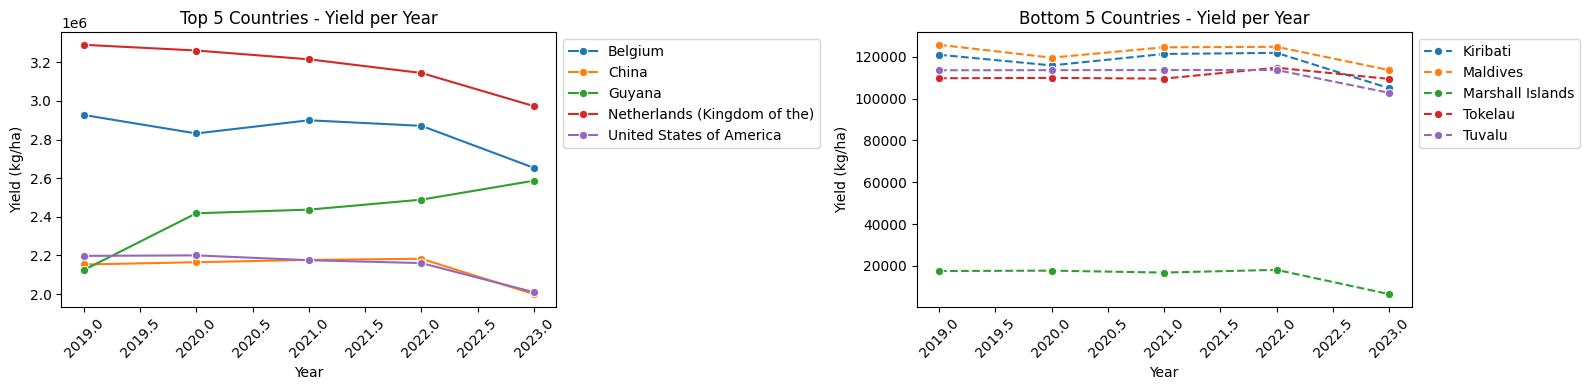

In [142]:
# Step 5: Plot
plt.figure(figsize=(16, 4))

#***Top 5 Country wise Yield Per Year:***
plt.subplot(1,2,1)
sns.lineplot(data=top_filtered_Yield, x='Year', y='Yield (kg/ha)', hue='Country', marker='o')

plt.title(f'Top {top_n_Yield} Countries - Yield per Year')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


#***Bottom 5 Country wise Yield Per Year:***
plt.subplot(1,2,2)
sns.lineplot(data=bottom_filtered_Yield, x='Year', y='Yield (kg/ha)', hue='Country', marker='o',linestyle='--')

plt.title(f'Bottom {bottom_n_Yield} Countries - Yield per Year')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

- > ***Top & Bottom Country wise Production Per Year:***

In [143]:
#***Country wise Production Per Year:***
# Step 1: Group data by Country and Year
grouped_Production = cpp.groupby(['Country', 'Year'])['Production (t)'].sum().reset_index()
grouped_Production.head()

# Step 2: Compute total area harvested per country
total_by_country_Production = grouped_Production.groupby('Country')['Production (t)'].sum().reset_index()
total_by_country_Production.head()

# Step 3: Get Top N countries
top_n_Production = 5  # Change this to your desired N
top_countries_Production = total_by_country_Production.nlargest(top_n_Production, 'Production (t)')['Country']
top_countries_Production

# Step 4: Filter original grouped data
top_filtered_Production = grouped_Production[grouped_Production['Country'].isin(top_countries_Production)]
top_filtered_Production.head()

# Step 3: Get Bottom N countries
bottom_n_Production = 5  # Change this to your desired N
bottom_countries_Production = total_by_country_Production.nsmallest(bottom_n_Production, 'Production (t)')['Country']
bottom_countries_Production

# Step 4: Filter original grouped data
bottom_filtered_Production = grouped_Production[grouped_Production['Country'].isin(bottom_countries_Production)]
bottom_filtered_Production.head()

,Country,Year,Production (t)
180,"China, Macao SAR",2019,21600.735
181,"China, Macao SAR",2020,21703.795
182,"China, Macao SAR",2021,21632.215
183,"China, Macao SAR",2022,21534.285
184,"China, Macao SAR",2023,21078.375


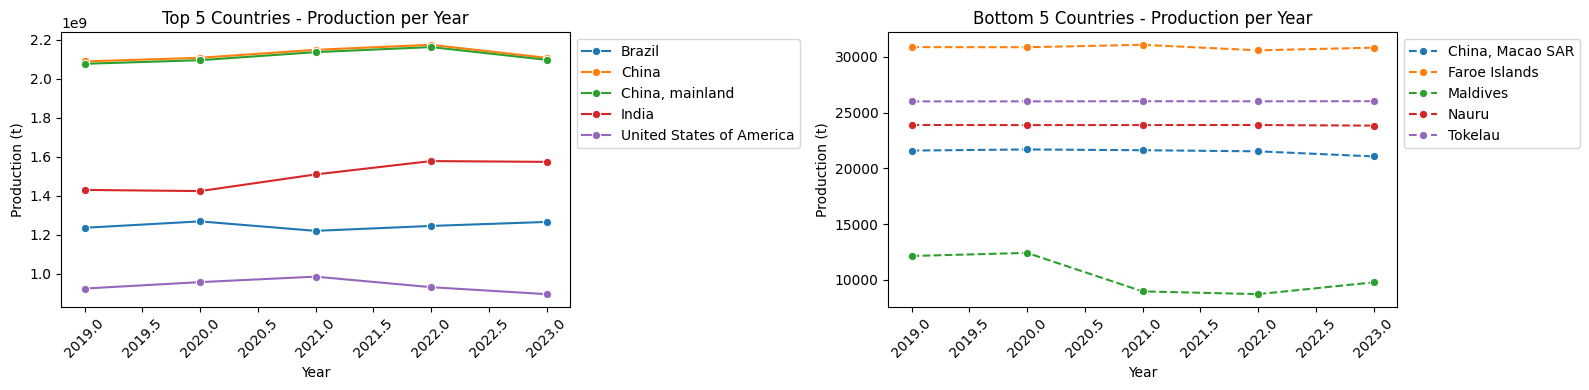

In [144]:
# Step 5: Plot
plt.figure(figsize=(16, 4))

#***Top 5 Country wise Yield Per Year:***
plt.subplot(1,2,1)
sns.lineplot(data=top_filtered_Production, x='Year', y='Production (t)', hue='Country', marker='o')

plt.title(f'Top {top_n_Production} Countries - Production per Year')
plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


#***Bottom 5 Country wise Yield Per Year:***
plt.subplot(1,2,2)
sns.lineplot(data=bottom_filtered_Production, x='Year', y='Production (t)', hue='Country', marker='o',linestyle='--')

plt.title(f'Bottom {bottom_n_Production} Countries - Production per Year')
plt.xlabel('Year')
plt.ylabel('Production (t)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**3.	Environmental Relationships**

> *Although explicit environmental data is absent, infer relationships between the Area harvested and Yield to check if there’s an impact of resource utilization on crop productivity.*

- > *Area harvested & Yield by Country*

In [145]:
# Group by Country and sum of Area harvested & Yield
country_total = cpp.groupby('Country')[['Area harvested (ha)','Yield (kg/ha)']].sum().reset_index()
country_total.head()

,Country,Area harvested (ha),Yield (kg/ha)
0,Afghanistan,17112229.0,2367651.3
1,Albania,2321674.0,7589497.5
2,Algeria,22709865.0,5906130.8
3,Angola,30870402.0,2578813.2
4,Antigua and Barbuda,429413.0,1542616.0


In [146]:
fig = px.scatter(
    country_total,
    x="Area harvested (ha)",
    y="Yield (kg/ha)",
    hover_name="Country",
    log_x=True,
    log_y=True,
    title="Relationship Between Area Harvested and Yield by Country",
    color=country_total["Country"]
)

fig.update_layout(
    xaxis_title="Area Harvested (ha)",
    yaxis_title="Yield (kg/ha)"
)

fig.show()

- > *Area harvested & Yield by Crop*

In [147]:
# Group by Item and sum of Area harvested & Yield
Item_total = cpp.groupby('Item')[['Area harvested (ha)','Yield (kg/ha)']].sum().reset_index()
Item_total.head()

,Item,Area harvested (ha),Yield (kg/ha)
0,"Abaca, manila hemp, raw",900401.0,25088.4
1,"Agave fibres, raw, n.e.c.",290250.0,29670.0
2,"Almonds, in shell",11319919.0,995936.6
3,"Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",11521768.0,359468.1
4,Apples,33312343.0,8384530.2


In [148]:
fig = px.scatter(
    Item_total,
    x="Area harvested (ha)",
    y="Yield (kg/ha)",
    hover_name="Item",
    log_x=True,
    log_y=True,
    title="Relationship Between Area Harvested and Yield by Crop",
    color=Item_total["Item"]
)

fig.update_layout(
    xaxis_title="Area Harvested (ha)",
    yaxis_title="Yield (kg/ha)"
)

fig.show()

**4.	Input-Output Relationships**

> *Study correlations between Area harvested, Yield, and Production to understand the relationship between land usage and productivity.*

In [149]:
a = cpp.loc[:,['Area harvested (ha)', 'Yield (kg/ha)','Production (t)']]
a.head()

,Area harvested (ha),Yield (kg/ha),Production (t)
0,29203.0,1308.3,38205.0
1,22134.0,1775.9,39307.0
2,36862.0,1743.2,64256.0
3,36462.0,1742.0,63515.0
4,37000.0,1810.8,67000.0


- CoVariance & Correlation

In [150]:
covariance = a.cov()
covariance

,Area harvested (ha),Yield (kg/ha),Production (t)
Area harvested (ha),1.066839e+12,-2.684094e+08,6.060599e+12
Yield (kg/ha),-2.684094e+08,4.662848e+08,1.268606e+10
Production (t),6.060599e+12,1.268606e+10,8.715582e+13


In [151]:
correlation = a.corr()
correlation

,Area harvested (ha),Yield (kg/ha),Production (t)
Area harvested (ha),1.000000,-0.012034,0.628518
Yield (kg/ha),-0.012034,1.000000,0.062929
Production (t),0.628518,0.062929,1.000000


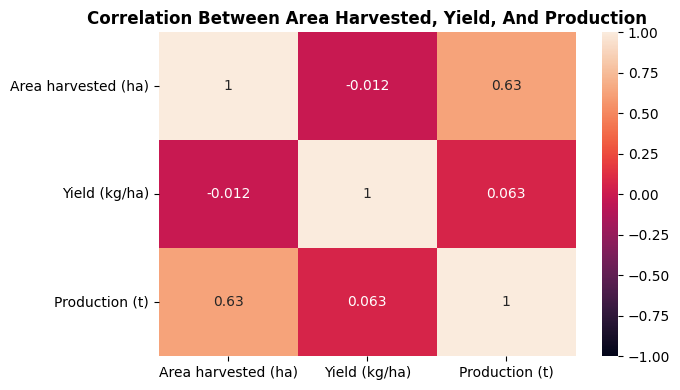

In [152]:
plt.figure(figsize=(7, 4))
sns.heatmap(a.corr(), vmax=1, vmin=-1, annot=True)
plt.title('Correlation Between Area Harvested, Yield, And Production', fontsize=12, fontweight='bold')
plt.tight_layout()  # Optional: prevents title from overlapping the plot
plt.show()


#annot=True -> values will be displayed
# vmax=1,vmin=-1 -> rightside we got the heat bars

**5.	Comparative Analysis**

> *Across Crops: Compare yields (Yield) of different crops (Item) to identify high-yield vs. low-yield crops.*

In [153]:
crop_yield = cpp.groupby("Item")["Yield (kg/ha)"].mean().reset_index().sort_values(by="Yield (kg/ha)", ascending=False)
crop_yield.head()

,Item,Yield (kg/ha)
102,"Hen eggs in shell, fresh",85511.961954
67,Cucumbers and gherkins,59323.883871
255,Tomatoes,59036.584179
245,Sugar cane,57630.743215
244,Sugar beet,44369.189097


- Top 10 High-Yield Crops:

In [154]:
# Filter top 10 crops
top_crops = crop_yield.nlargest(10, 'Yield (kg/ha)')
top_crops

,Item,Yield (kg/ha)
102,"Hen eggs in shell, fresh",85511.961954
67,Cucumbers and gherkins,59323.883871
255,Tomatoes,59036.584179
245,Sugar cane,57630.743215
244,Sugar beet,44369.189097
79,Eggplants (aubergines),33875.324750
80,"Eggs from other birds in shell, fresh, n.e.c.",32044.325000
217,Raw milk of cattle,30581.449198
53,"Chillies and peppers, green (Capsicum spp. and Pimenta spp.)",29226.928067
33,Carrots and turnips,28258.747945


In [155]:
# Create bar chart
fig = px.bar(
    top_crops,
    x='Item',
    y='Yield (kg/ha)',
    title='Top 10 High-Yield Crops',
    text='Yield (kg/ha)',
    labels={'Item': 'Crop'},
    color='Item'  # Optional: color bars by crop name
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45
)

fig.show()

- Top 10 Low-Yield Crops:

In [156]:
# Filter bottom 10 crops
bottom_crops = crop_yield.nsmallest(10, 'Yield (kg/ha)')
bottom_crops

,Item,Yield (kg/ha)
261,"Vanilla, raw",343.235065
202,"Pyrethrum, dried flowers",387.751429
114,Kola nuts,455.890000
106,Jojoba seeds,472.740000
56,Cocoa beans,499.494138
55,"Cloves (whole stems), raw",695.492000
11,"Bambara beans, dry",704.830000
211,Raw hides and skins of buffaloes,722.073973
1,"Agave fibres, raw, n.e.c.",741.750000
85,Fonio,784.007273


In [157]:
# Create bar chart
fig = px.bar(
    bottom_crops,
    x='Item',
    y='Yield (kg/ha)',
    title='Top 10 Low-Yield Crops',
    text='Yield (kg/ha)',
    labels={'Item': 'Crop'},
    color='Item'  # Optional: color bars by crop name
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45
)

fig.show()

> *Across Regions: Compare production (Production) across different areas (Area) to find highly productive regions.*

In [158]:
highly_productive_region=cpp.groupby('Country')['Production (t)'].mean().reset_index().sort_values(by="Production (t)", ascending=False)
highly_productive_region.head()

,Country,Production (t)
83,India,1.067986e+07
38,"China, mainland",1.060390e+07
34,China,1.012419e+07
22,Brazil,9.094530e+06
191,United States of America,6.091215e+06


In [159]:
# Filter Top 10 Production
top_Production = highly_productive_region.nlargest(10, 'Production (t)')
top_Production

,Country,Production (t)
83,India,1.067986e+07
38,"China, mainland",1.060390e+07
34,China,1.012419e+07
22,Brazil,9.094530e+06
191,United States of America,6.091215e+06
84,Indonesia,4.118717e+06
130,Nigeria,2.449689e+06
149,Russian Federation,2.352823e+06
135,Pakistan,1.745476e+06
176,Thailand,1.683647e+06


In [160]:
# Create bar chart
fig = px.bar(
    top_Production,
    x='Country',
    y='Production (t)',
    title='Top 10 High Productive Regions',
    text='Production (t)',
    labels={'Country'},
    color='Production (t)'  # Optional: color bars by crop name
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45
)

fig.show()

- **Productivity Analysis**

> *Examine variations in Yield to identify efficient crops and regions.*

In [179]:
# Top 10 crops by yield
top_yield_crops = Item_total.groupby("Item")["Yield (kg/ha)"].mean().sort_values(ascending=False).head(10)
top_yield_crops.head()

Item
Hen eggs in shell, fresh    82262507.4
Tomatoes                    50003986.8
Cucumbers and gherkins      40458888.8
Raw milk of cattle          28593655.0
Sugar cane                  27605126.0
Name: Yield (kg/ha), dtype: float64

In [180]:
# Top 10 regions by yield (assuming 'Area' column is region)
top_yield_regions = cpp.groupby("Item")["Yield (kg/ha)"].mean().sort_values(ascending=False).head(10)
top_yield_regions.head()

Item
Hen eggs in shell, fresh    85511.961954
Cucumbers and gherkins      59323.883871
Tomatoes                    59036.584179
Sugar cane                  57630.743215
Sugar beet                  44369.189097
Name: Yield (kg/ha), dtype: float64

In [ ]:
fig = px.bar(
    top_yield_crops.reset_index(),
    x="Item",
    y="Yield (kg/ha)",
    title="Top 10 Crops by Average Yield (kg/ha)",
    text="Yield (kg/ha)",
    color="Item"
)
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()


> *Calculate productivity ratios: Production/Area harvested to cross-verify yields.*

In [163]:
cpp["Calculated_Yield_(kg/ha)"] = cpp["Production (t)"] * 1000 / cpp["Area harvested (ha)"]
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha)
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0,1308.256001
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0,1775.865185
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0,1743.150128
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0,1741.950524
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0,1810.810811


In [164]:
# Compare with existing Yield column
cpp["Yield_Diff"] = cpp["Yield (kg/ha)"] - cpp["Calculated_Yield_(kg/ha)"]
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha),Yield_Diff
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0,1308.256001,0.043999
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0,1775.865185,0.034815
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0,1743.150128,0.049872
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0,1741.950524,0.049476
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0,1810.810811,-0.010811


- absolute difference is greater than 0.1

In [165]:
# Show rows with a meaningful difference (>0.1 for example)
greater_Yield_Diff = cpp[cpp["Yield_Diff"].abs() > 0.1][["Yield (kg/ha)", "Calculated_Yield_(kg/ha)", "Yield_Diff"]]
greater_Yield_Diff.head()

# cpp["Yield_Diff"].abs() > 0.1 -> This creates a Boolean mask: True for rows where the absolute difference is greater than 0.1.

,Yield (kg/ha),Calculated_Yield_(kg/ha),Yield_Diff
20,5463.8,3470.078203,1993.721797
21,5463.8,3470.078203,1993.721797
22,5463.8,3470.078203,1993.721797
23,5463.8,3470.078203,1993.721797
24,5463.8,3470.078203,1993.721797


In [166]:
greater_Yield_Diff.shape

(61010, 3)

- absolute difference is less than 0.1

In [167]:
lower_Yield_Diff = cpp[cpp["Yield_Diff"].abs() <= 0.1][["Yield (kg/ha)", "Calculated_Yield_(kg/ha)", "Yield_Diff"]]
lower_Yield_Diff.head()

,Yield (kg/ha),Calculated_Yield_(kg/ha),Yield_Diff
0,1308.3,1308.256001,0.043999
1,1775.9,1775.865185,0.034815
2,1743.2,1743.150128,0.049872
3,1742.0,1741.950524,0.049476
4,1810.8,1810.810811,-0.010811


In [168]:
lower_Yield_Diff.shape

(28770, 3)

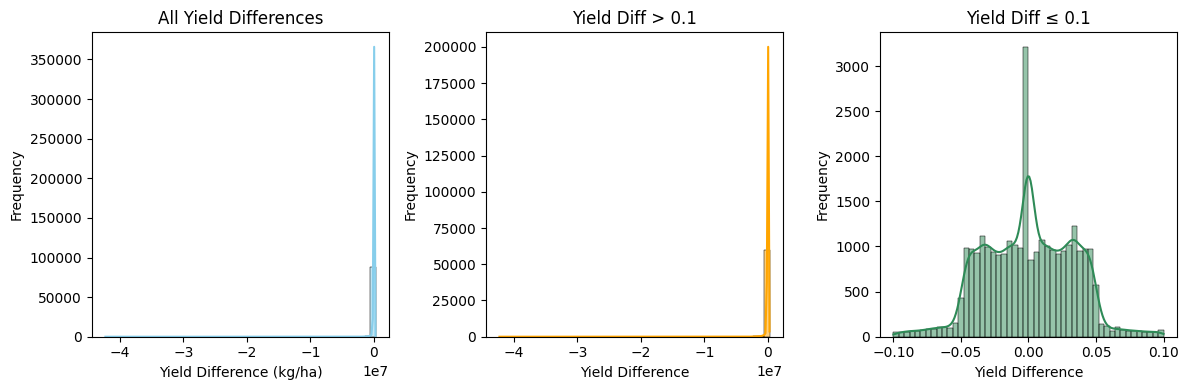

In [169]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(cpp["Yield_Diff"], bins=50, kde=True, color="skyblue")
plt.title("All Yield Differences")
plt.xlabel("Yield Difference (kg/ha)")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(greater_Yield_Diff["Yield_Diff"], bins=50, kde=True, color="orange")
plt.title("Yield Diff > 0.1")
plt.xlabel("Yield Difference")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(lower_Yield_Diff["Yield_Diff"], bins=50, kde=True, color="seagreen")
plt.title("Yield Diff ≤ 0.1")
plt.xlabel("Yield Difference")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**6.	Outliers and Anomalies**

> *Identify anomalies in Yield or Production, such as unusually high or low values, and correlate them with potential external factors like policies or environmental changes.*

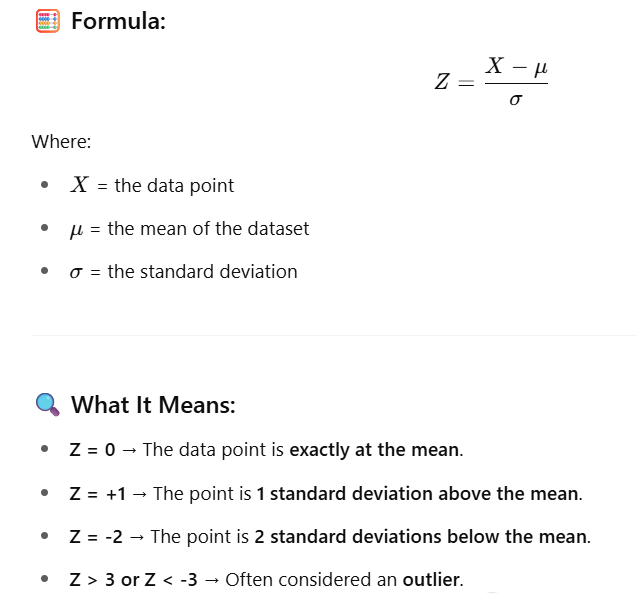

- Z-scores of Total Yield(kg/ha) by Year:

In [170]:
from scipy.stats import zscore

cpp["Yield_Z"] = zscore(cpp["Yield (kg/ha)"])
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha),Yield_Diff,Yield_Z
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0,1308.256001,0.043999,-0.397525
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0,1775.865185,0.034815,-0.375870
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0,1743.150128,0.049872,-0.377384
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0,1741.950524,0.049476,-0.377440
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0,1810.810811,-0.010811,-0.374254


In [171]:
fig = px.scatter(
    cpp,
    x="Year",
    y="Yield_Z",
    color="Country",
    # hover_data=["Item", "Yield (kg/ha)", "Calculated_Yield_(kg/ha)", "Yield_Diff"],
    title="Z-scores of Reported Yield (kg/ha) by Year",
    labels={"Yield_Z": "Z-Score of Yield"}
)

fig.add_hline(y=0, line_dash="dash", line_color="gray")
fig.add_hline(y=3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z > 3)")
fig.add_hline(y=-3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z < -3)")

fig.show()

- Z-scores of Total Production (t) by Year:

In [172]:
cpp["Production_Z"] = zscore(cpp["Production (t)"])
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha),Yield_Diff,Yield_Z,Production_Z
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0,1308.256001,0.043999,-0.397525,-0.076750
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0,1775.865185,0.034815,-0.375870,-0.076632
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0,1743.150128,0.049872,-0.377384,-0.073960
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0,1741.950524,0.049476,-0.377440,-0.074039
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0,1810.810811,-0.010811,-0.374254,-0.073666


In [173]:
fig = px.scatter(
    cpp,
    x="Year",
    y="Production_Z",
    color="Country",
    # hover_data=["Item", "Production (t)", "Production_Z"],
    title="Z-scores of Reported Production (t) by Year",
    labels={"Production_Z": "Z-Score of Production"}
)

fig.add_hline(y=0, line_dash="dash", line_color="gray")
fig.add_hline(y=3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z > 3)")
fig.add_hline(y=-3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z < -3)")

fig.show()

- Z-scores of yield_outliers > 3:

In [174]:
# Set a threshold for anomalies
yield_outliers = cpp[cpp["Yield_Z"].abs() > 3]
yield_outliers.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha),Yield_Diff,Yield_Z,Production_Z
519,Albania,"Hen eggs in shell, fresh",2019,3005.0,108975.0,54527.15,18145.474210,90829.525790,4.588543,-0.075002
520,Albania,"Hen eggs in shell, fresh",2020,3005.0,108349.0,54244.13,18051.291181,90297.708819,4.559553,-0.075032
521,Albania,"Hen eggs in shell, fresh",2021,3005.0,107453.0,56628.00,18844.592346,88608.407654,4.518059,-0.074777
522,Albania,"Hen eggs in shell, fresh",2022,3005.0,96213.0,48918.00,16278.868552,79934.131448,3.997532,-0.075603
523,Albania,"Hen eggs in shell, fresh",2023,3005.0,87623.0,42558.66,14162.615641,73460.384359,3.599727,-0.076284


In [175]:
#Yield Outliers:
fig = px.scatter(
    yield_outliers,
    x="Year",
    y="Yield_Z",
    color="Country",
    # hover_data=["Item", "Yield_Z"],
    title="Z-scores of yield_outliers > 3:",
    labels={"Yield_Z": "Z-Score of Yield > 3"}
)
fig.add_hline(y=0, line_dash="dash", line_color="gray")
fig.add_hline(y=3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z > 3)")
fig.add_hline(y=-3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z < -3)")

- Z-scores of production_outliers > 3:

In [176]:
# Set a threshold for anomalies
production_outliers = cpp[cpp["Production_Z"].abs() > 3]
production_outliers.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha),Yield_Diff,Yield_Z,Production_Z
2346,Argentina,Maize (corn),2019,7232761.0,7861.5,56860704.0,7861.548861,-0.048861,-0.094044,6.009846
2347,Argentina,Maize (corn),2020,7730506.0,7553.9,58395811.0,7553.944205,-0.044205,-0.108289,6.174280
2348,Argentina,Maize (corn),2021,8146596.0,7429.6,60525805.0,7429.582245,0.017755,-0.114046,6.402437
2349,Argentina,Maize (corn),2022,8768441.0,6732.9,59037179.0,6732.916262,-0.016262,-0.146310,6.242981
2350,Argentina,Maize (corn),2023,8104641.0,5109.4,41409448.0,5109.350063,0.049937,-0.221495,4.354770


In [177]:
#production Outliers:
fig = px.scatter(
    production_outliers,
    x="Year",
    y="Production_Z",
    color="Country",
    # hover_data=["Item", "Production_Z"],
    title="Z-scores of production_outliers > 3:",
    labels={"Production_Z": "Z-Score of Production > 3"}
)

fig.add_hline(y=0, line_dash="dash", line_color="gray")
fig.add_hline(y=3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z > 3)")
fig.add_hline(y=-3, line_dash="dot", line_color="red", annotation_text="Potential Outlier (Z < -3)")

fig.show()

In [178]:
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t),Calculated_Yield_(kg/ha),Yield_Diff,Yield_Z,Production_Z
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0,1308.256001,0.043999,-0.397525,-0.076750
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0,1775.865185,0.034815,-0.375870,-0.076632
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0,1743.150128,0.049872,-0.377384,-0.073960
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0,1741.950524,0.049476,-0.377440,-0.074039
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0,1810.810811,-0.010811,-0.374254,-0.073666
